# Task 1

## Choose the most suitable evaluation metric and state why you chose it.

### As we are dealing with continuous variables, we use Root Mean Square Error (RMSE).Most commonly, it is used in regression models, since it reduces the unit of the difference between predicted and actual values to the same unit as the target variable, while MSE provides the squared unit.

## Note

### But  some cases, it creates a problem due to taking the difference between actual and predicted values to overcome this problem we take a log this method called root mean squared log error. But in this case, it is fine

#### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [2]:
# Load dataset

df = pd.read_csv("nyc_taxi_trip_duration.csv")

In [3]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


## Univariate analysis

In [4]:
# check null values

df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

### Observation

    So we can see that there is not any missing values

In [5]:
# check duplicate values

df[df.duplicated()].sum()

id                    0.0
vendor_id             0.0
pickup_datetime       0.0
dropoff_datetime      0.0
passenger_count       0.0
pickup_longitude      0.0
pickup_latitude       0.0
dropoff_longitude     0.0
dropoff_latitude      0.0
store_and_fwd_flag    0.0
trip_duration         0.0
dtype: float64

### Observation 

    We can see that in our dataset there is not any duplicate values present

In [6]:
# check datatypes of different features

df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

### Observation

    We can see that Vender_id and passenger_count are int type but we know that they are categorical values 
    change it as object type 

In [7]:
df.vendor_id.value_counts()

2    390481
1    338841
Name: vendor_id, dtype: int64

In [8]:
df.passenger_count.value_counts()

1    517415
2    105097
5     38926
3     29692
6     24107
4     14050
0        33
7         1
9         1
Name: passenger_count, dtype: int64

In [9]:
# Changing vendor_id and passenger_count from int to object

df["vendor_id"]=df["vendor_id"].astype("object")
df["passenger_count"]=df["passenger_count"].astype("object")

# now check its conversion

df.dtypes

id                     object
vendor_id              object
pickup_datetime        object
dropoff_datetime       object
passenger_count        object
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

### Our main focus is trip duration because it is a target variable

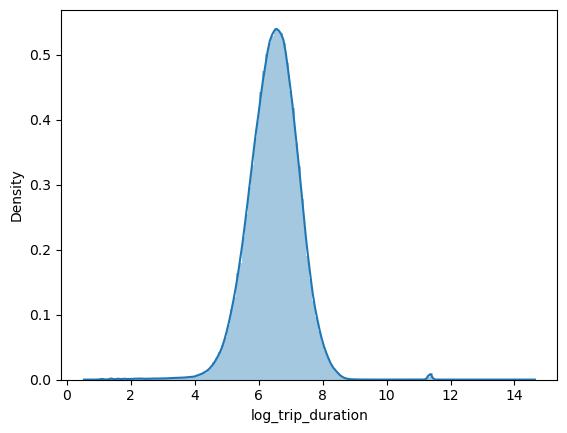

In [10]:
#check  outliers

df['log_trip_duration'] = np.log(df['trip_duration'].values + 1)
sns.distplot(df['log_trip_duration'], kde = True, bins = 150)
plt.show()

### Observations

    1.The majority of rides follow a rather smooth distribution that looks almost log-normal with a peak just around exp(6.5) i.e. about 17 minutes.
    2.There are several suspiciously short rides with less than 10 seconds duration.
    3.As discussed earlier, there are a few huge outliers near 12.

In [11]:
# get dummies of passenger_count and store_and_fwd_flag
new_df= pd.get_dummies(df.drop(["id","vendor_id","pickup_datetime","dropoff_datetime"],axis = 1))

new_df.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,log_trip_duration,passenger_count_0,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6,passenger_count_7,passenger_count_9,store_and_fwd_flag_N,store_and_fwd_flag_Y
0,-73.953918,40.778873,-73.963875,40.771164,400,5.993961,0,1,0,0,0,0,0,0,0,1,0
1,-73.988312,40.731743,-73.994751,40.694931,1100,7.003974,0,0,1,0,0,0,0,0,0,1,0
2,-73.997314,40.721458,-73.948029,40.774918,1635,7.400010,0,0,1,0,0,0,0,0,0,1,0
3,-73.961670,40.759720,-73.956779,40.780628,1141,7.040536,0,0,0,0,0,0,1,0,0,1,0
4,-74.017120,40.708469,-73.988182,40.740631,848,6.744059,0,1,0,0,0,0,0,0,0,1,0
